# **Import libraries**

In [1]:
!pip install imperio

In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, KBinsDiscretizer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
from imperio import BoxCoxTransformer, ZCATransformer, FrequencyImputationTransformer, TargetImputationTransformer, SmoothingTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **Load Datasets**

## Dataset 1

[Chosen Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

I'll try to predict math score.

In [4]:
df_st_per = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "spscientist/students-performance-in-exams",
  'StudentsPerformance.csv',
)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.


In [5]:
df_st_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df_st_per.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


But first, let's encode the data.

In [7]:
df_st_per['gender'] = (df_st_per['gender'] == 'male').astype(int)
df_st_per['lunch'] = (df_st_per['lunch'] == 'standard').astype(int)
df_st_per['test preparation course'] = (df_st_per['test preparation course'] == 'completed').astype(int)

In [8]:
categorical_columns_1 = df_st_per.loc[:, df_st_per.nunique() <= 6].columns

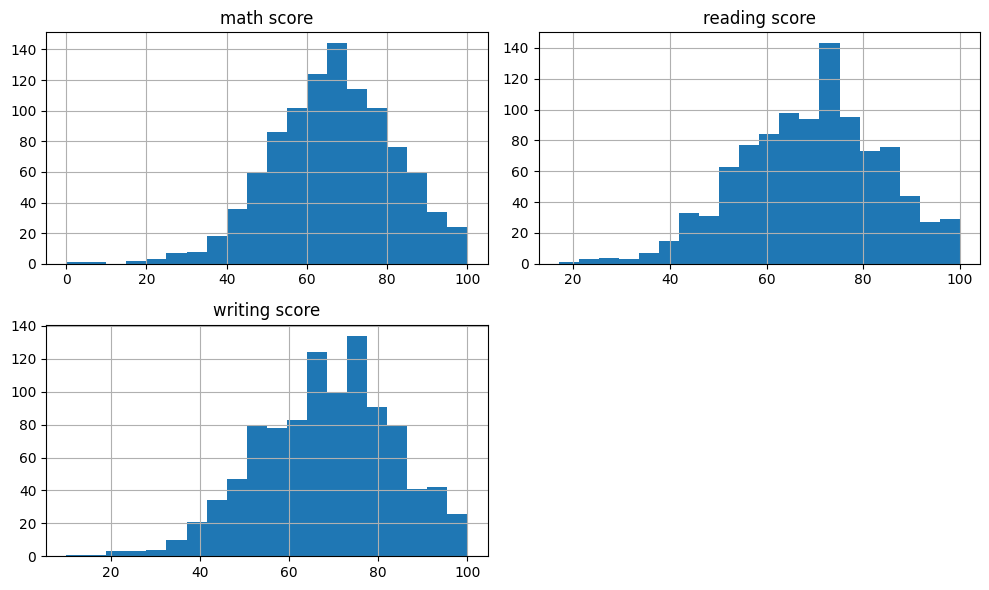

In [9]:
df_st_per.drop(categorical_columns_1, axis=1).hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

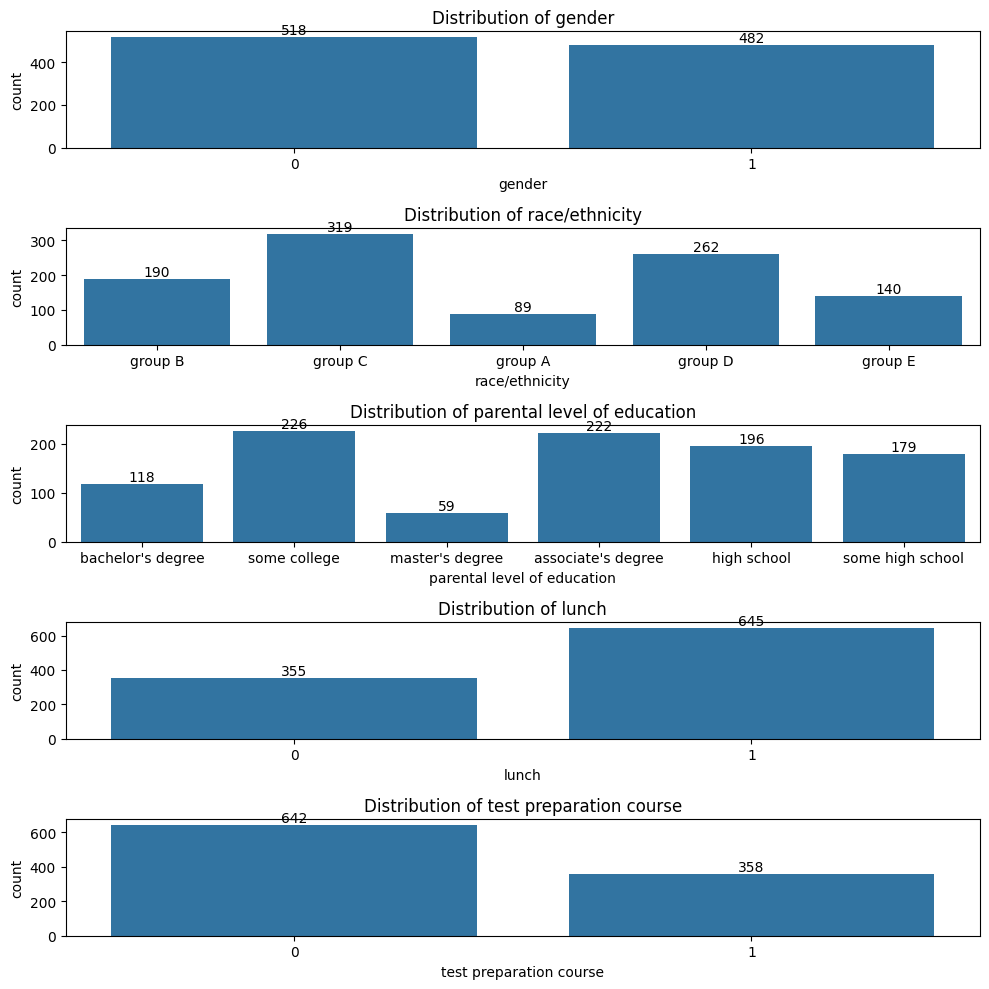

In [10]:
fig, ax = plt.subplots(nrows=len(categorical_columns_1), ncols=1, figsize=(10, 10))

for i, col in enumerate(categorical_columns_1):
    sns.countplot(data=df_st_per, x=col, ax=ax[i])

    ax[i].bar_label(ax[i].containers[0])
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [11]:
df_st_per.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75


In [12]:
X = df_st_per.drop(['race/ethnicity', 'parental level of education', 'math score'], axis=1)
y = df_st_per['math score']

splits = list(kf.split(X))

X_trains1 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests1  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains1 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests1  = [y.iloc[val_idx]   for _, val_idx in splits]

## Dataset 2

In [13]:
df_gr_ad = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
  'Admission_Predict.csv',
)

100%|██████████| 12.6k/12.6k [00:00<00:00, 19.9MB/s]


In [14]:
df_gr_ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df_gr_ad.drop('Serial No.', axis=1, inplace=True)

In [16]:
categorical_columns_2 = df_gr_ad.loc[:, df_gr_ad.nunique() < 10].columns

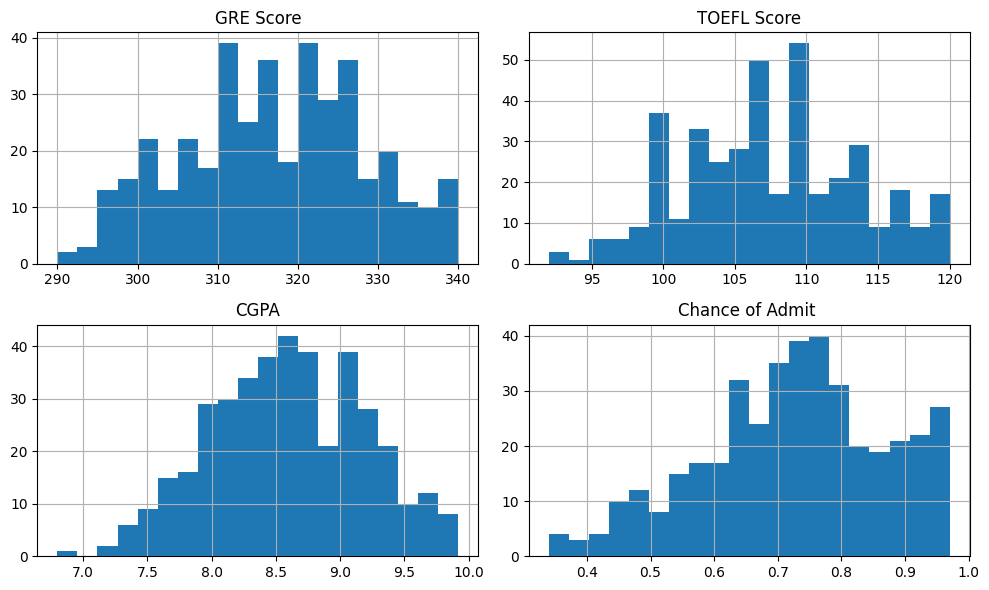

In [17]:
df_gr_ad.drop(categorical_columns_2, axis=1).hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

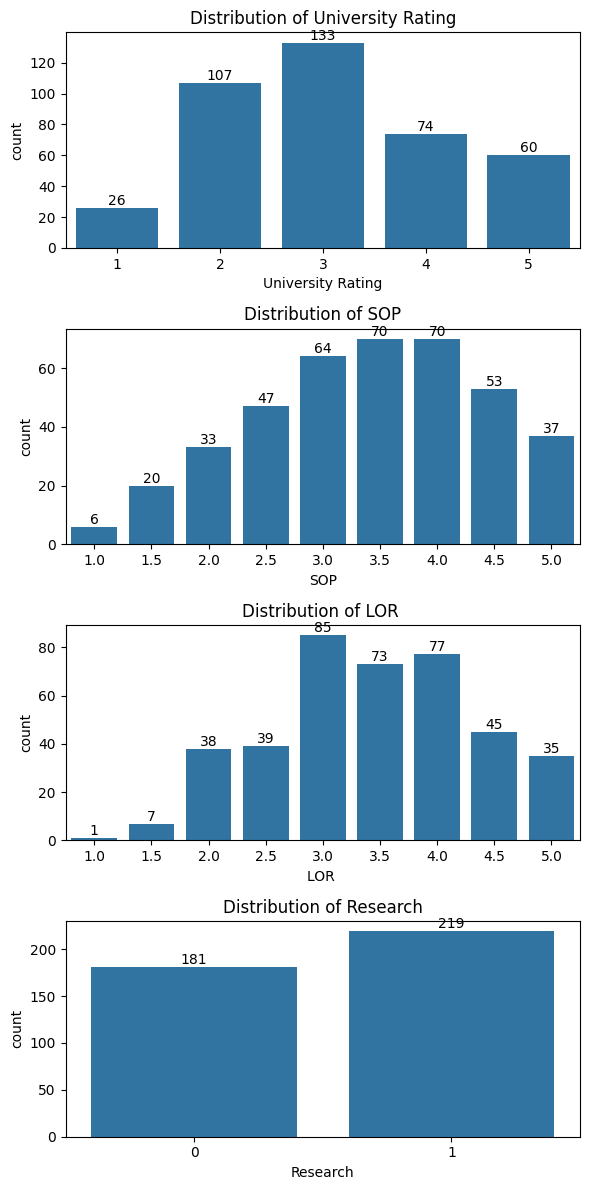

In [18]:
fig, ax = plt.subplots(nrows=len(categorical_columns_2), ncols=1, figsize=(6, 12))

for i, col in enumerate(categorical_columns_2):
    sns.countplot(data=df_gr_ad, x=col, ax=ax[i])

    ax[i].bar_label(ax[i].containers[0])
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [19]:
X = df_gr_ad.drop('Chance of Admit ', axis=1)
y = df_gr_ad['Chance of Admit ']

splits = list(kf.split(X))

X_trains2 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests2  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains2 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests2  = [y.iloc[val_idx]   for _, val_idx in splits]

## Dataset 3

In [20]:
df_av = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "neuromusic/avocado-prices",
  'avocado.csv',
)

100%|██████████| 629k/629k [00:00<00:00, 23.2MB/s]

Extracting zip of avocado.csv...


In [21]:
df_av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
df_av['Date'] = (pd.to_datetime(df_av['Date'])).astype(int)
df_av['type'] = (df_av['type'] == 'conventional').astype(int)
df_av.drop(['Unnamed: 0', 'Total Bags', 'Total Volume'], axis=1, inplace=True)

In [23]:
categorical_columns_3 = df_av.loc[:, df_av.nunique() <= 4].columns

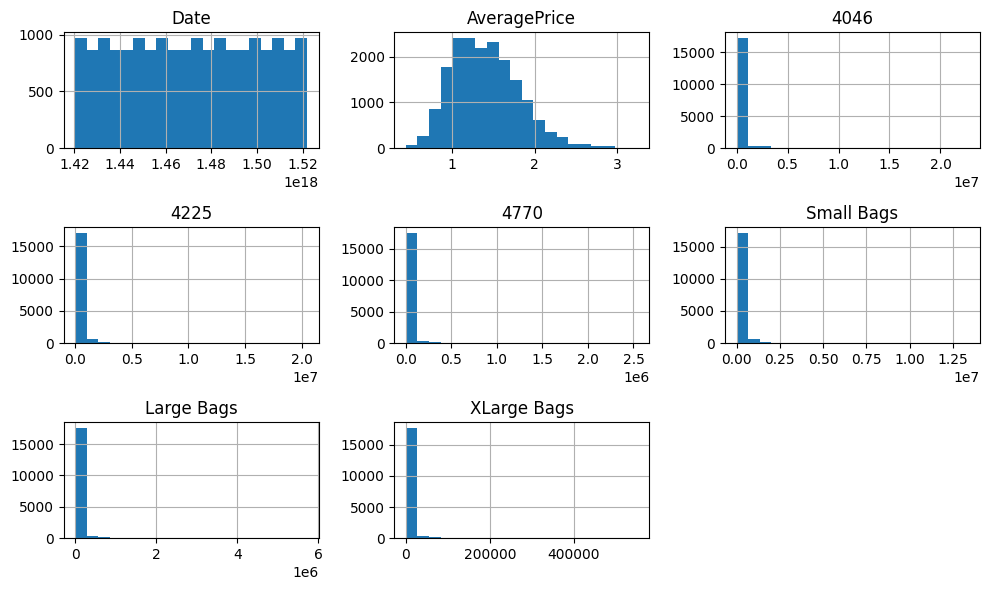

In [24]:
df_av.drop(categorical_columns_3, axis=1).hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

In [132]:
df_av['4770'].nunique()

12071

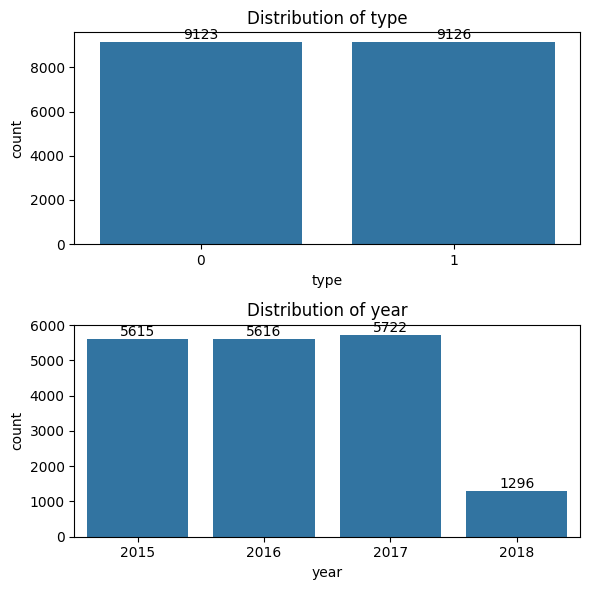

In [25]:
fig, ax = plt.subplots(nrows=len(categorical_columns_3), ncols=1, figsize=(6, 6))

for i, col in enumerate(categorical_columns_3):
    sns.countplot(data=df_av, x=col, ax=ax[i])

    ax[i].bar_label(ax[i].containers[0])
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [26]:
X = df_av.drop(['AveragePrice', 'region'], axis=1)
y = df_av['AveragePrice']

splits = list(kf.split(X))

X_trains3 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests3  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains3 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests3  = [y.iloc[val_idx]   for _, val_idx in splits]

## Dataset 4

In [27]:
df_heart = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  "heart.csv"
)

Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


In [28]:
df_heart['Sex'] = df_heart['Sex'].replace({'F': 1, 'M': 0})
df_heart['ExerciseAngina'] = df_heart['ExerciseAngina'].replace({'Y': 1, 'N': 0})

In [29]:
categorical_columns = df_heart.select_dtypes(include=['object']).columns.tolist()

In [30]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 86.2+ KB


In [31]:
df_heart = df_heart.drop(df_heart[df_heart['RestingBP'] < 75].index)

In [32]:
categorical_columns_4 = df_heart.loc[:, df_heart.nunique() <= 2].columns

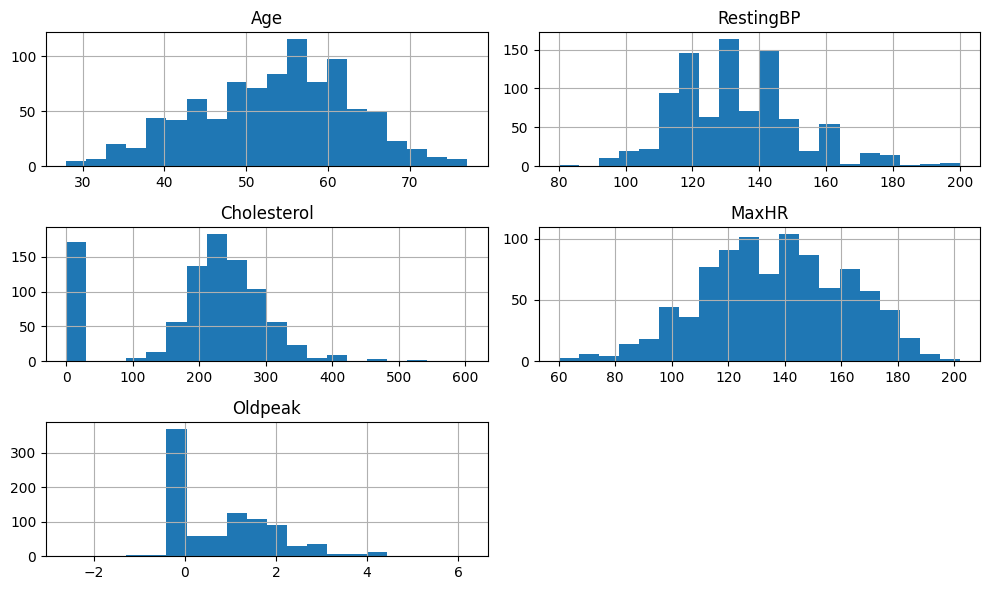

In [33]:
df_heart.drop(categorical_columns_4, axis=1).hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

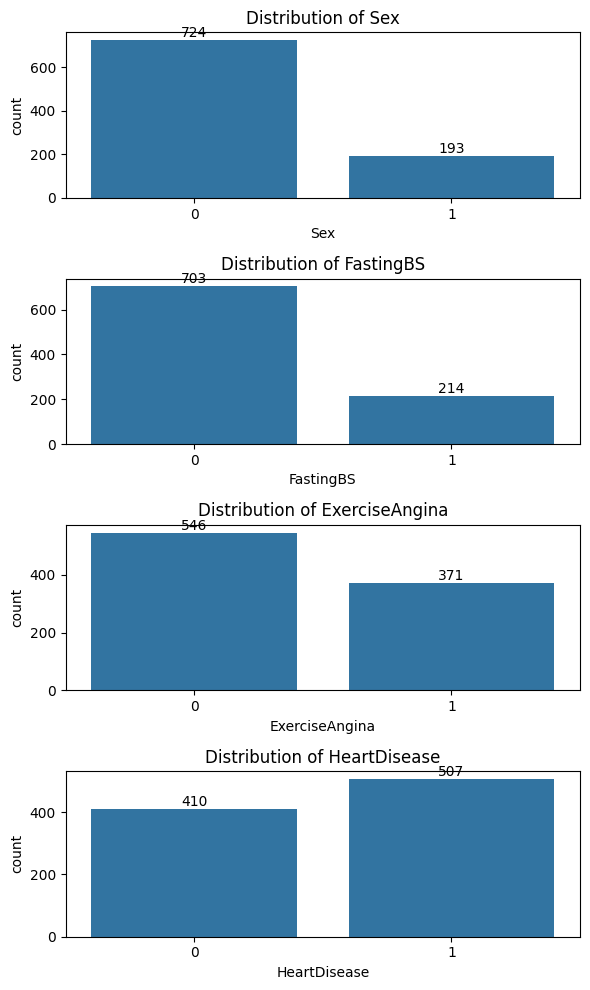

In [34]:
fig, ax = plt.subplots(nrows=len(categorical_columns_4), ncols=1, figsize=(6, 10))

for i, col in enumerate(categorical_columns_4):
    sns.countplot(data=df_heart, x=col, ax=ax[i])

    ax[i].bar_label(ax[i].containers[0])
    ax[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [35]:
X = df_heart.drop(['HeartDisease'] + categorical_columns, axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

# **Feature Enginering**

## **Initial Dataset Performances**

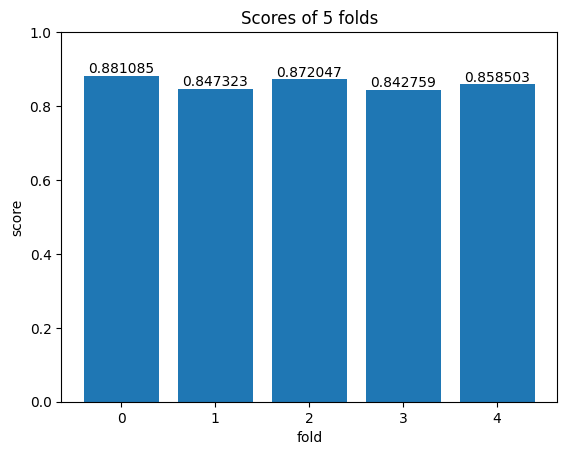

In [36]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Before any scaling, the dataset gives a stable 0.84-0.88 score.

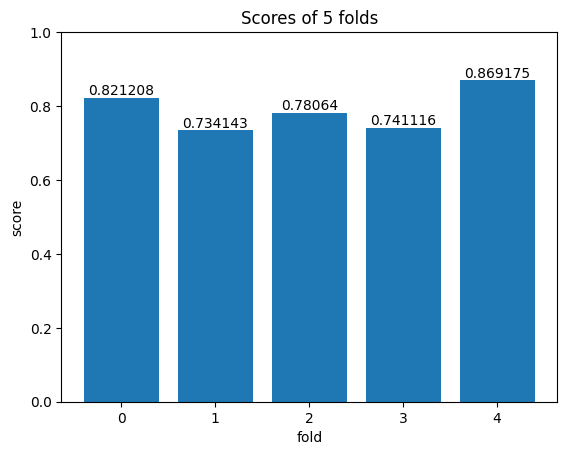

In [37]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains2, X_tests2, y_trains2, y_tests2):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The score of LinearRegression varies a lot from 0.74-0.86.

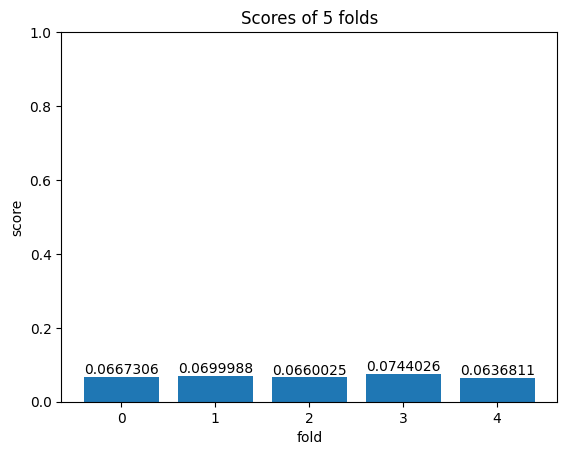

In [38]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The model before scaling performs EXTREMELY bad(doesn't grasp any relation) in 0.064-0.074 range.

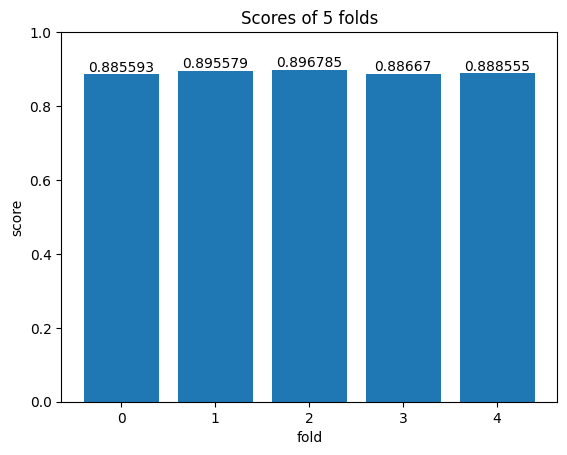

In [39]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  scores.append(rf.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

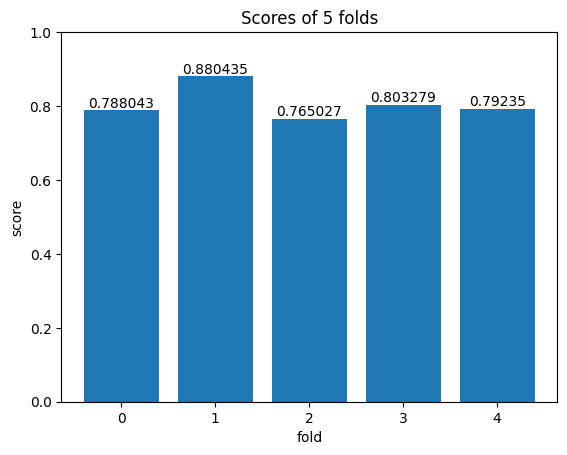

In [40]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The model performance also varies a lot ~0.76-0.88.

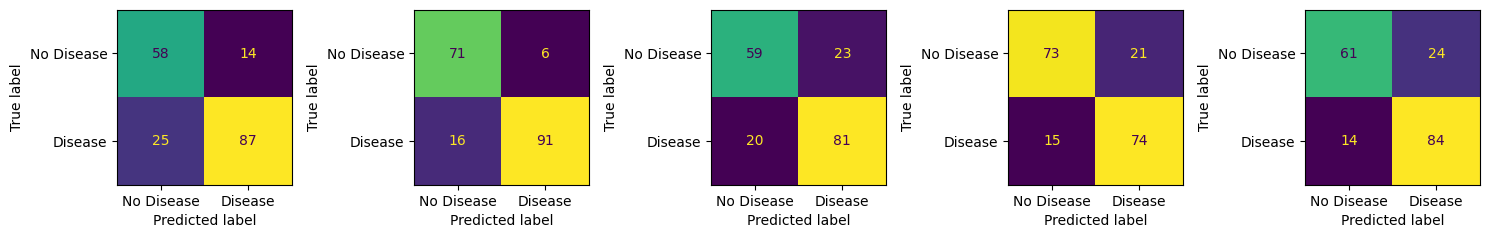

In [41]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

As we see, the true disease labels are distributed correctly for 74-91 people(which cannot be aloud in real life, of course).

## **Feature Scaling**

### Standardization

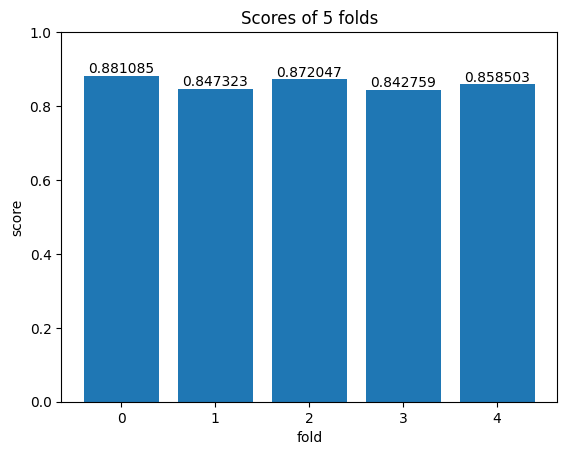

In [42]:
cols_to_scale = ['writing score', 'reading score']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The performance of this dataset hadn't changed at all - scaling wasn't that important for Linear Regression.

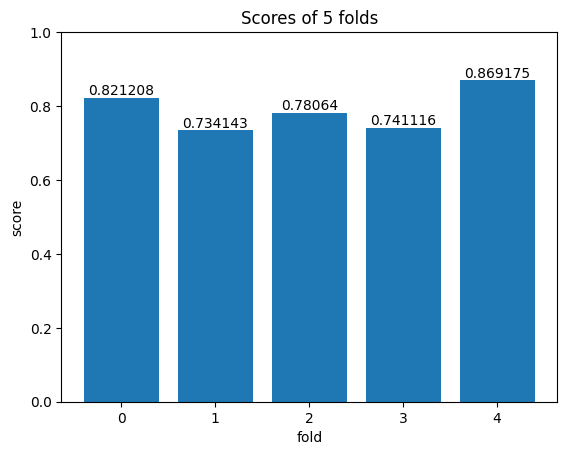

In [43]:
cols_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains2, X_tests2, y_trains2, y_tests2):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

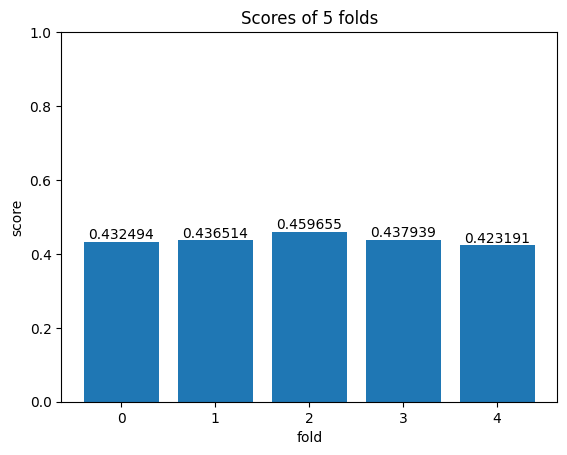

In [44]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The performance increased a lot!(stil veeery bad)

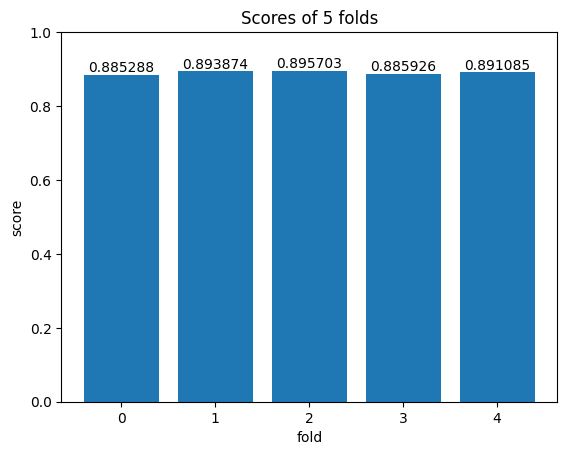

In [45]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train)
  scores.append(rf.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

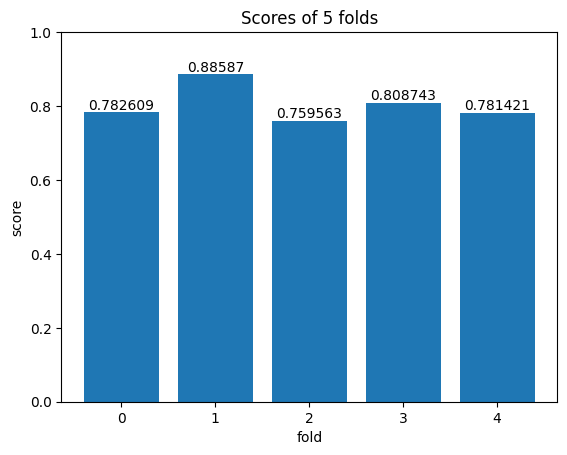

In [46]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
std_scaler = StandardScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

This model score also remained the same.

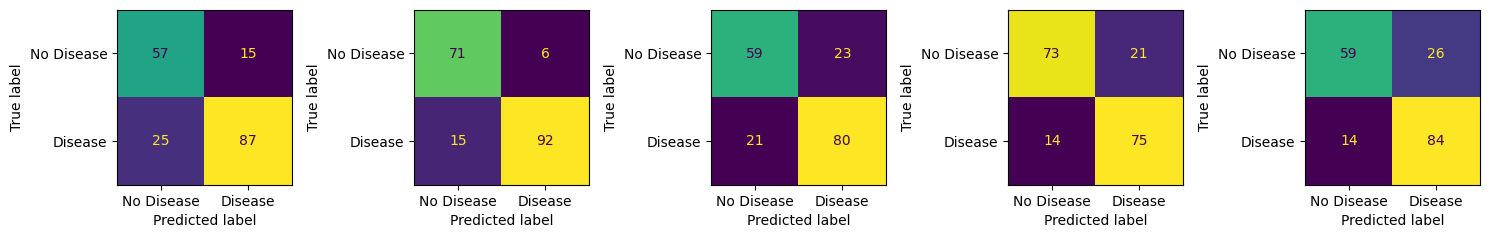

In [47]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Up there it seemed strange, but actually the confusion matrix changed a bit - in the majority of cases predicting 1 more true positive.

### **Normalization**

As it is quite close to scaling, let's do it on the same dataset and compare the results.

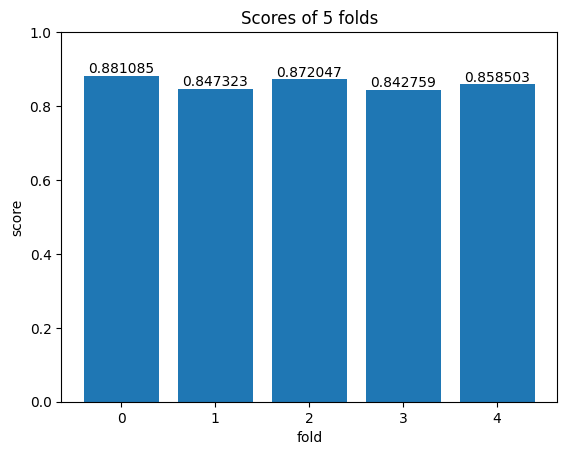

In [48]:
cols_to_scale = ['writing score', 'reading score']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The same - nothing changed.

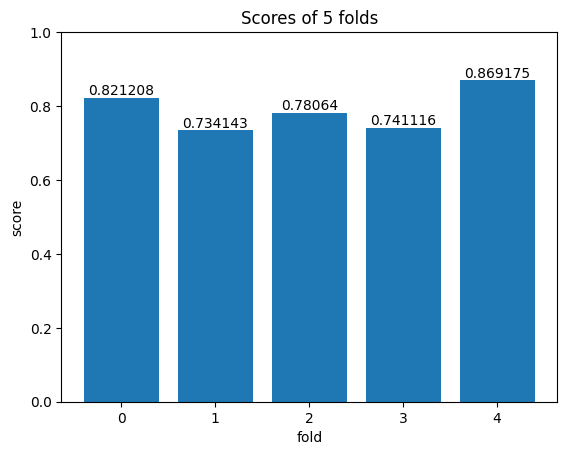

In [49]:
cols_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains2, X_tests2, y_trains2, y_tests2):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

No changes... At all.

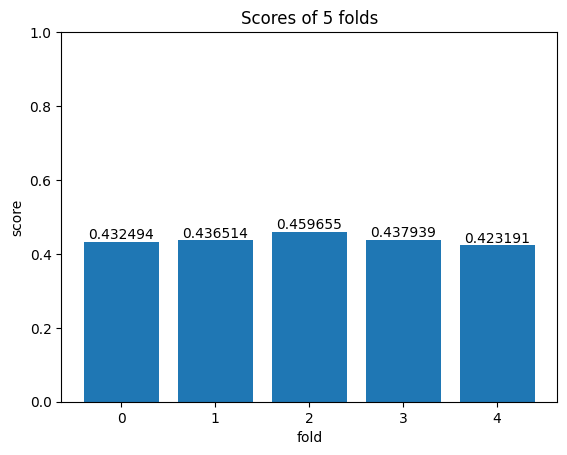

In [50]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

As bad as the previous scaling algorithm...

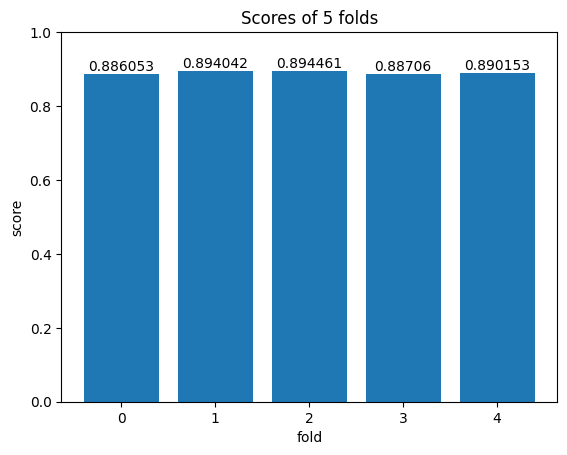

In [51]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train)
  scores.append(rf.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

As RandomForest is unsensitive to scaling, it hadn't improved the results.

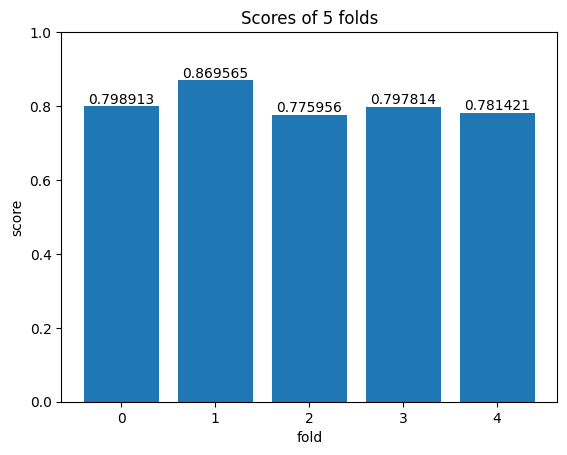

In [52]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

NOTHING

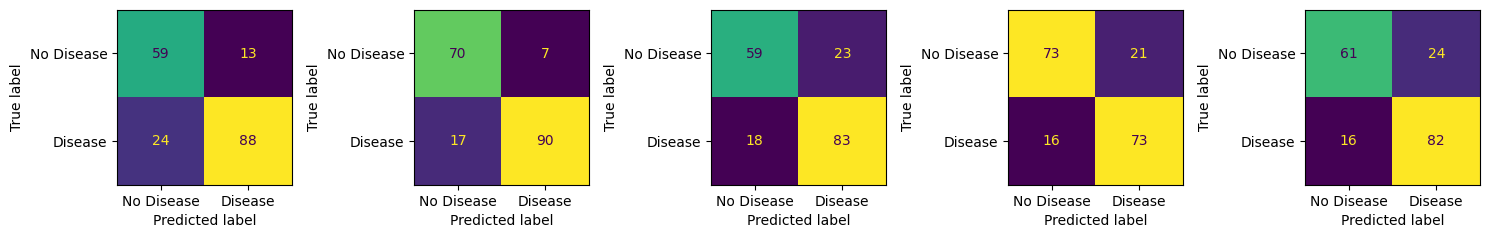

In [53]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

But the results look different now. Actually, it seems that the model predictions became worse, as the number of true positives decreased.

## **Dummy vars**

In [54]:
dum_cols = ['race/ethnicity', 'parental level of education']
df_st_per = (pd.get_dummies(df_st_per, columns=dum_cols)).astype(int)

In [55]:
X = df_st_per.drop('math score', axis=1)
y = df_st_per['math score']

splits = list(kf.split(X))

X_trains1 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests1  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains1 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests1  = [y.iloc[val_idx]   for _, val_idx in splits]

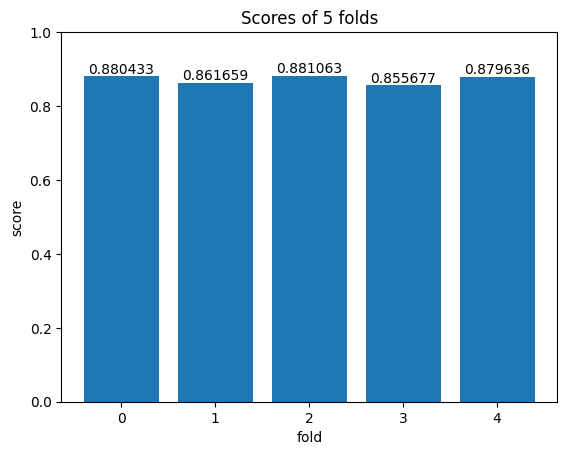

In [56]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains1, X_tests1, y_trains1, y_tests1):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The performance increased! Nice, that means that not encoded categorical columns actually carried some meaningful data.

In [57]:
dum_cols = ['region']
df_av = (pd.get_dummies(df_av, columns=dum_cols)).astype(int)

In [58]:
X = df_av.drop('AveragePrice', axis=1)
y = df_av['AveragePrice']

splits = list(kf.split(X))

X_trains3 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests3  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains3 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests3  = [y.iloc[val_idx]   for _, val_idx in splits]

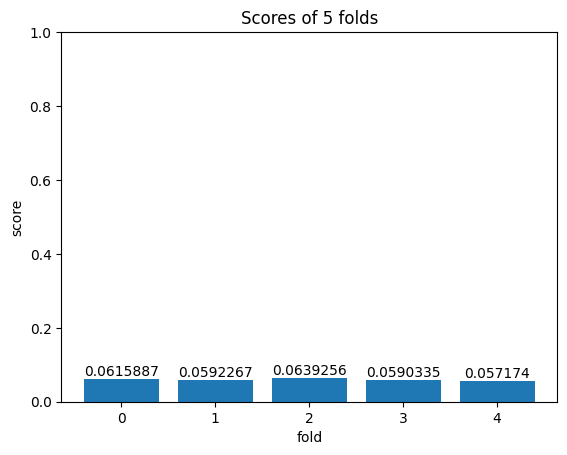

In [59]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The performance dropped even more than initial data....

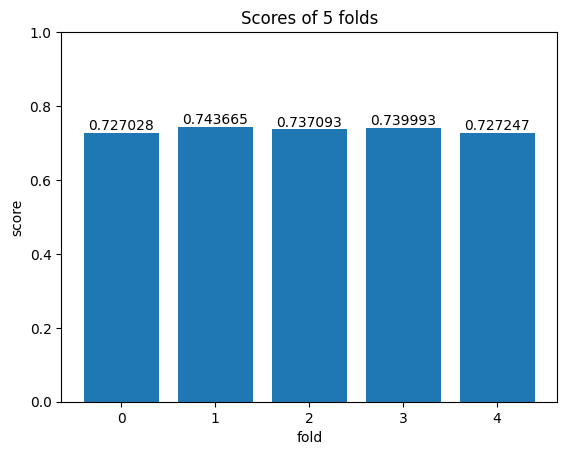

In [60]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  scores.append(rf.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Interesting... Maybe there are too many new features which are too sparse and they act as noise.

In [61]:
df_heart = (pd.get_dummies(df_heart, columns=categorical_columns)).astype(int)

In [62]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

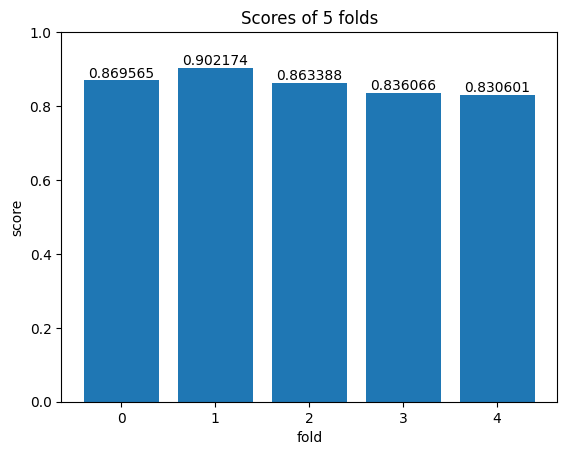

In [63]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The performance raised through all the samples! That means that these columns were valuable for LogisticRegression correlations.

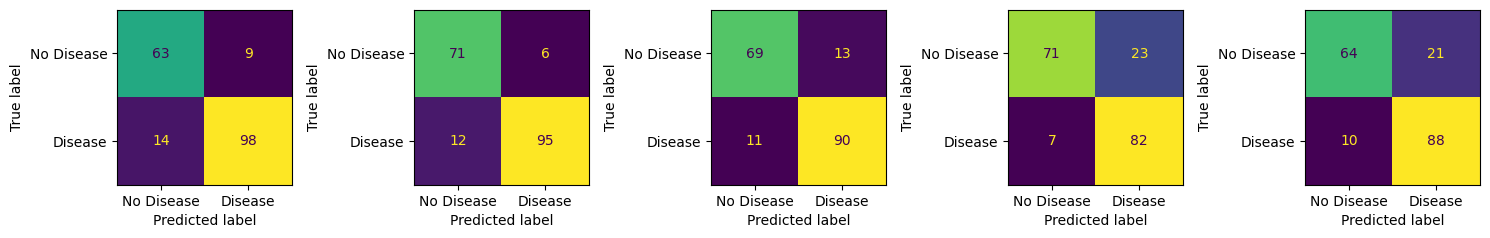

In [64]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Up to 98 people correctly spotted! And the number of mismatches also decreased a lot!

## **Box-Cox Transformation**

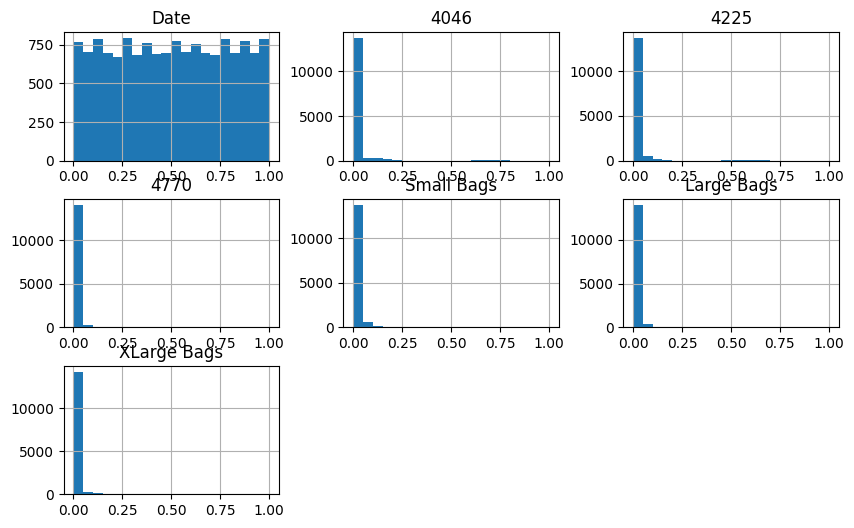

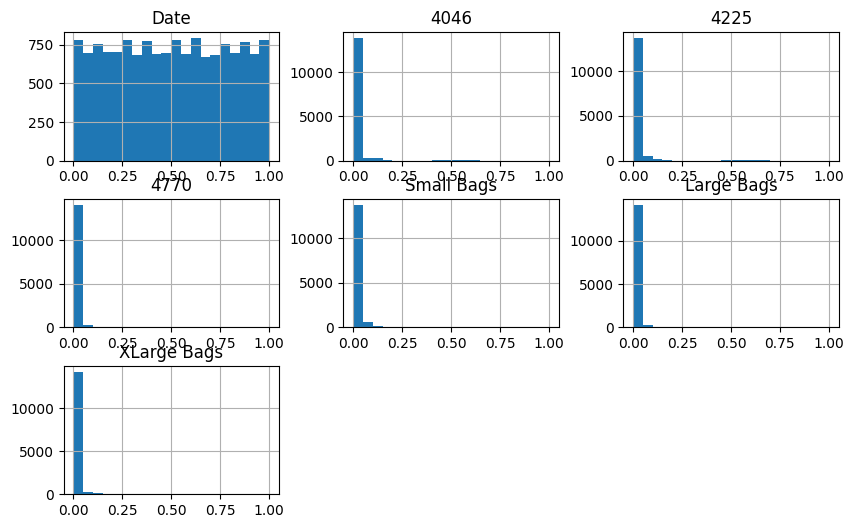

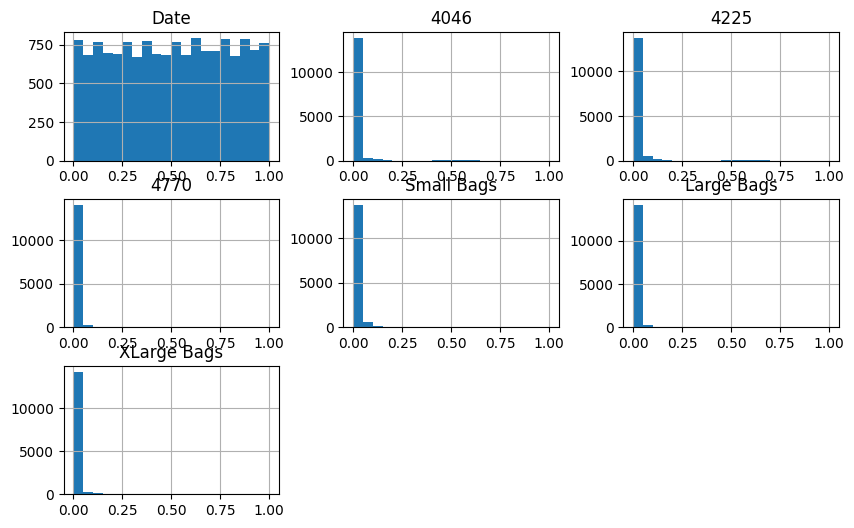

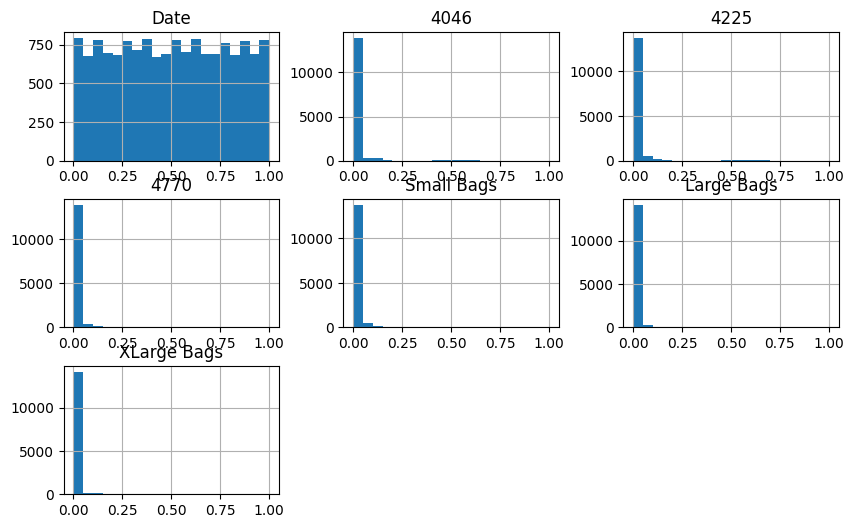

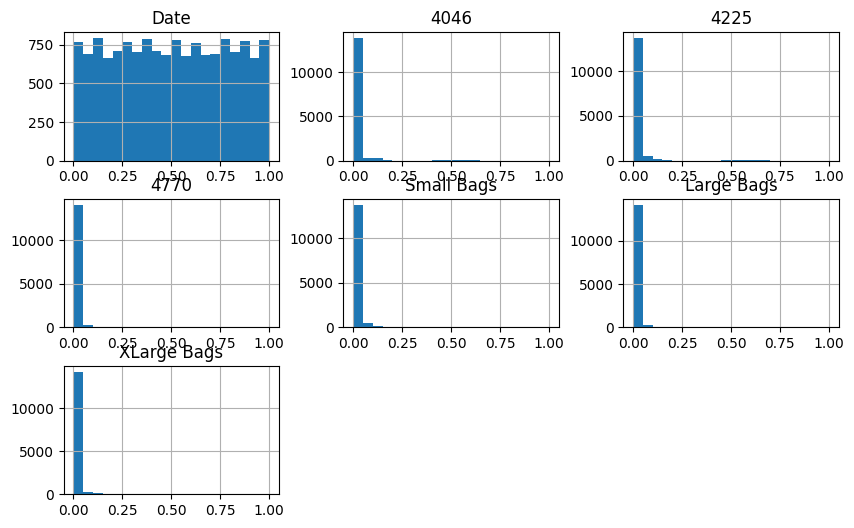

In [65]:
cols_to_scale = ['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']
mm_scaler = MinMaxScaler()
scores = []
X_trains_scaled = []
X_tests_scaled = []

for (X_train, X_test, y_train, y_test) in zip(X_trains3, X_tests3, y_trains3, y_tests3):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  X_trains_scaled.append(X_train_scaled)
  X_tests_scaled.append(X_test_scaled)

  X_train_scaled[cols_to_scale].hist(bins=20, figsize=(10, 6))

In [66]:
bx_transformer = BoxCoxTransformer(l=0.08)

for i in range(5):
  X_trains_scaled[i][cols_to_scale] = bx_transformer.fit_transform(
    X_trains_scaled[i][cols_to_scale].values, y_trains3[i].values
  )

  X_tests_scaled[i][cols_to_scale] = bx_transformer.transform(
    X_tests_scaled[i][cols_to_scale].values
  )

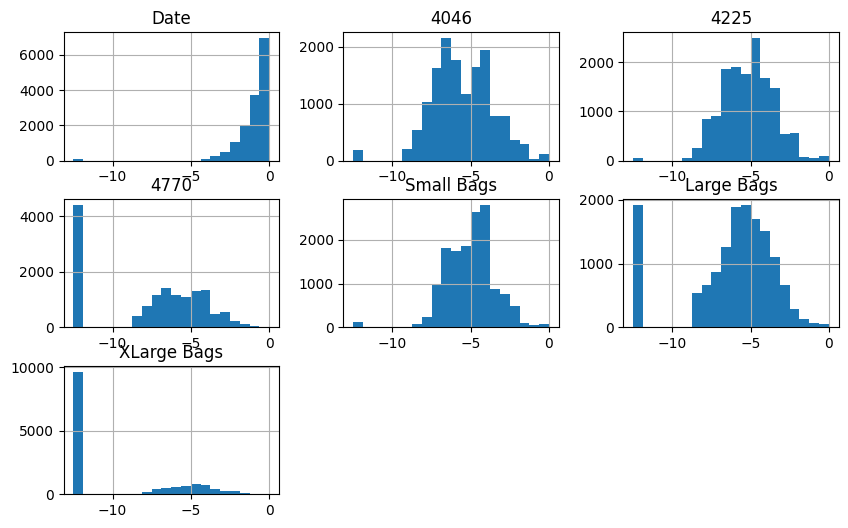

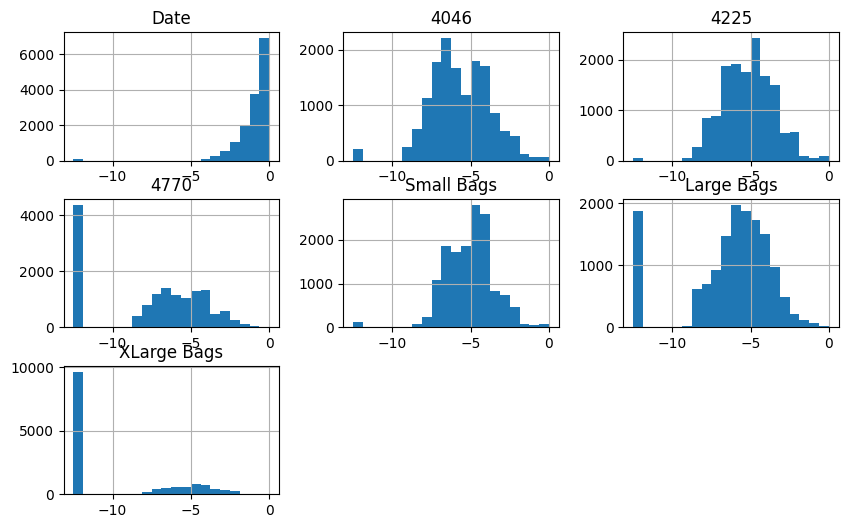

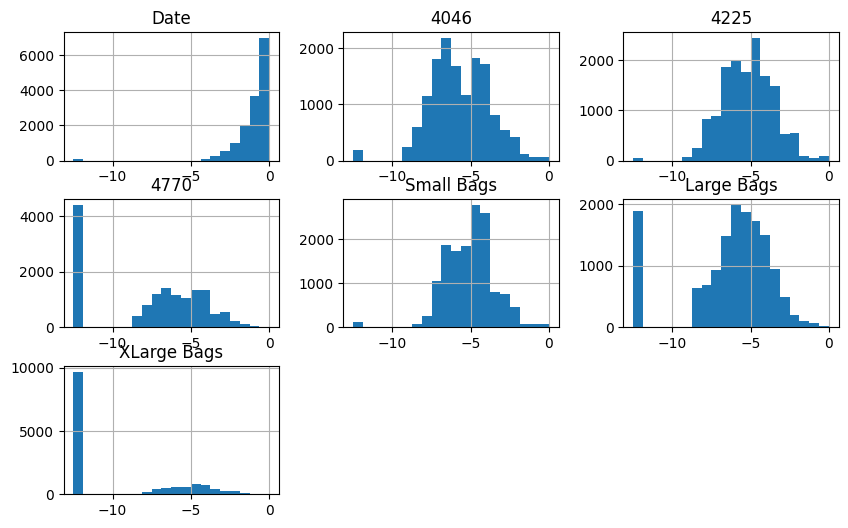

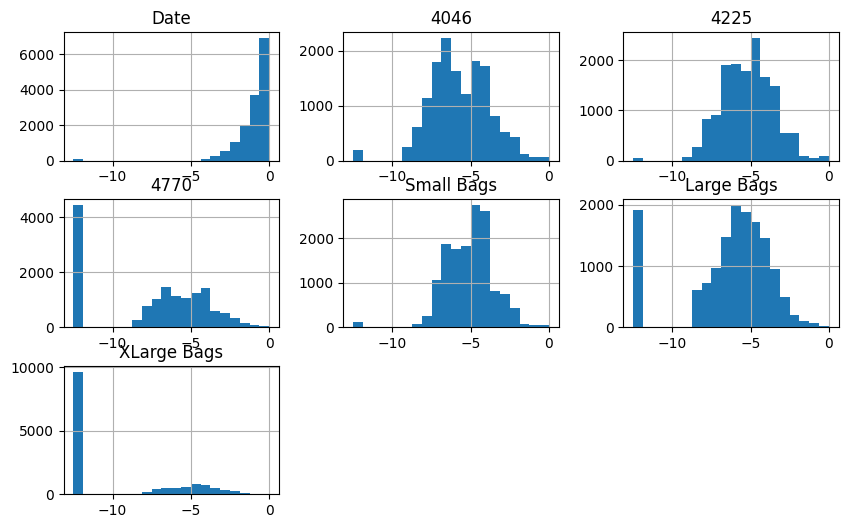

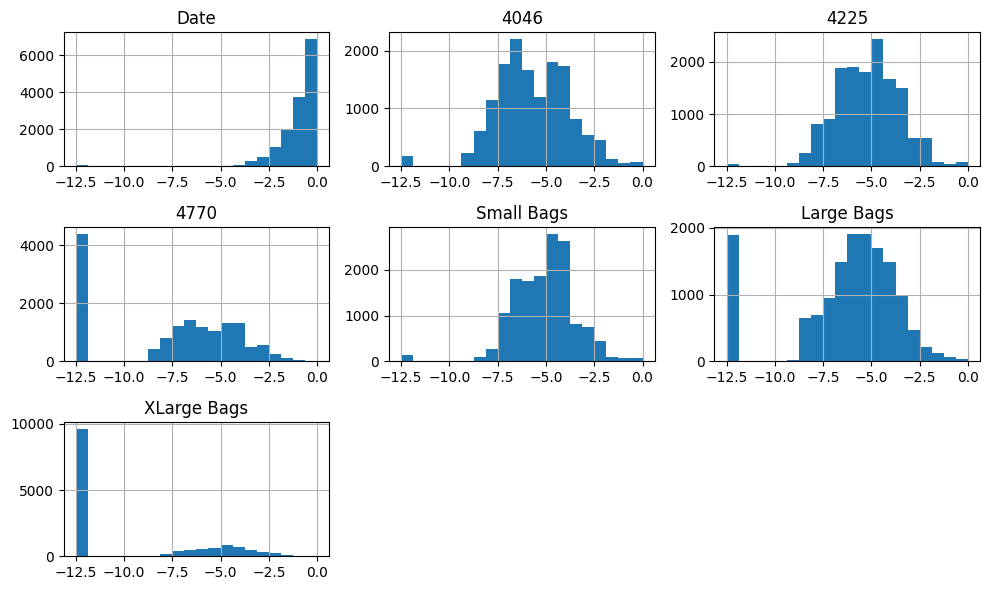

In [67]:
for i in range(5):
  X_trains_scaled[i][cols_to_scale].hist(bins=20, figsize=(10, 6))

plt.tight_layout()
plt.show()

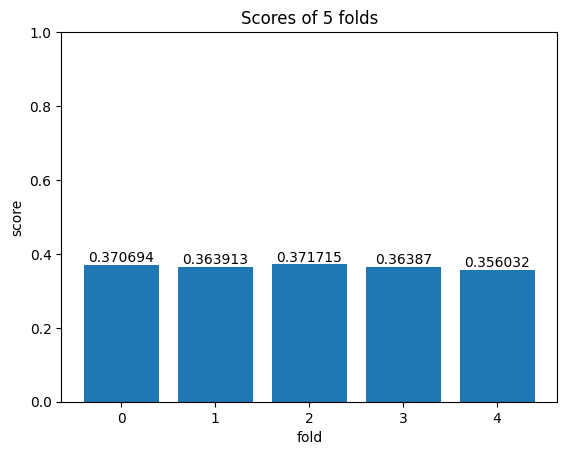

In [68]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains_scaled, X_tests_scaled, y_trains3, y_tests3):
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Unfortunately, Box-Cox doesn't work on that data. The performance drastically dropped. Most probably, because it hadn't made it completely normally distributed - even though there appears to be a bell, there is still a high column at the left.

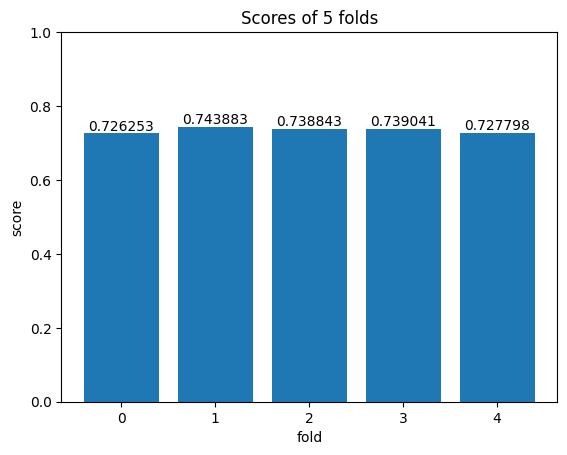

In [69]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains_scaled, X_tests_scaled, y_trains3, y_tests3):
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  scores.append(rf.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

The distribution changes due to box-cox, but it made the relationship weaker.

## **ZCA Transformation**

In [70]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [71]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

X_trains_scaled = [X_train.copy() for X_train in X_trains4]
X_tests_scaled = [X_test.copy() for X_test in X_tests4]

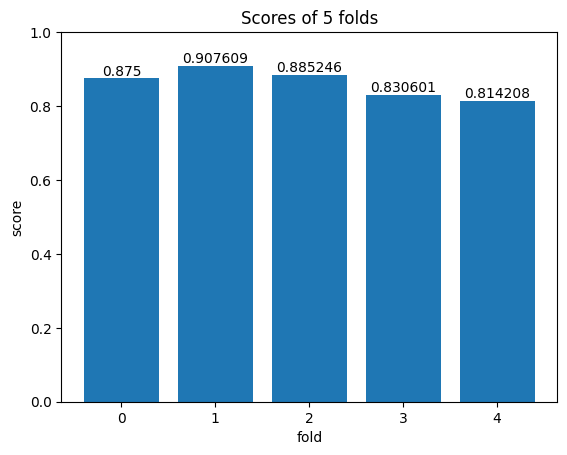

In [72]:
scores = []
zca_transformer = ZCATransformer()

for i in range(5):
  X_trains_scaled[i][cols_to_scale] = zca_transformer.fit_transform(
    X_trains_scaled[i][cols_to_scale].values, y_trains3[i].values
  )

  X_tests_scaled[i][cols_to_scale] = zca_transformer.transform(
    X_tests_scaled[i][cols_to_scale].values
  )

  lr = LogisticRegression()
  lr.fit(X_trains_scaled[i], y_trains4[i])
  scores.append(lr.score(X_tests_scaled[i], y_tests4[i]))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Even though the performance dropped a bit for some folds, it is still quite good. Let's take a look at the results!

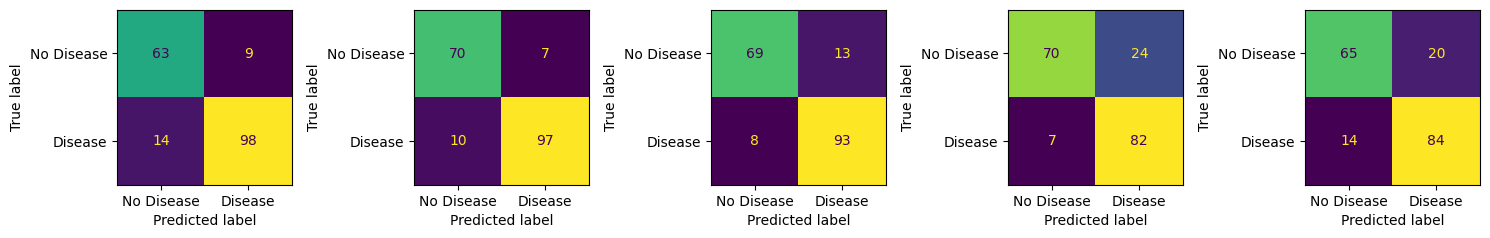

In [73]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains_scaled, X_tests_scaled, y_trains4, y_tests4)):

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Actually, the results have became slightly better for negatives, but worse for positives(bad for our case).

## **Frequency Imputation**

Let's load one more time the 4th dataset(as we replaced categorical cols with dummies)

In [74]:
df_heart = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  "heart.csv"
)

Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


In [75]:
df_heart['Sex'] = df_heart['Sex'].replace({'F': 1, 'M': 0})
df_heart['ExerciseAngina'] = df_heart['ExerciseAngina'].replace({'Y': 1, 'N': 0})

In [76]:
categorical_columns = df_heart.select_dtypes(include=['object']).columns.tolist()

Let's look at categorical columns' frequency

In [77]:
for i in categorical_columns:
  for j in df_heart[i].unique():
    print(i, j, df_heart[df_heart[i] == j][i].count())

ChestPainType ATA 173
ChestPainType NAP 203
ChestPainType ASY 496
ChestPainType TA 46
RestingECG Normal 552
RestingECG ST 178
RestingECG LVH 188
ST_Slope Up 395
ST_Slope Flat 460
ST_Slope Down 63


The frequency varies - nice, we can use frequency imputation transformer.

In [78]:
df_heart = df_heart.drop(df_heart[df_heart['RestingBP'] < 75].index)

Split the dataset

In [79]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [80]:
X_trains4[0].columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [81]:
categorical_columns

['ChestPainType', 'RestingECG', 'ST_Slope']

In [82]:
X_trains4[0][categorical_columns].nunique()

,0
ChestPainType,4
RestingECG,3
ST_Slope,3


In [83]:
indices = [X_trains4[0].columns.get_loc(c) for c in categorical_columns]

I wasted an hour to understand the problem with fr_transformer..................

In [84]:
lbl_encoder = LabelEncoder()

for j in range(5):
  for col in categorical_columns:
    X_trains4[j][col] = lbl_encoder.fit_transform(X_trains4[j][col])
    X_tests4[j][col] = lbl_encoder.transform(X_tests4[j][col])

  col_indices = [X_trains4[j].columns.get_loc(c) for c in categorical_columns]

  fr_transformer = FrequencyImputationTransformer(index=col_indices)

  X_trains4[j] = pd.DataFrame(fr_transformer.fit_transform(
    X=X_trains4[j].values,
    y=y_trains4[j].values),
    columns = X_trains4[j].columns
  )

  X_tests4[j] = pd.DataFrame(fr_transformer.transform(X_tests4[j].values),
      columns = X_tests4[j].columns
      )

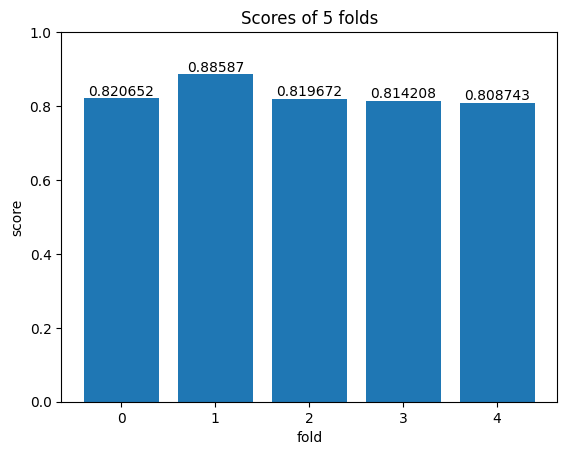

In [85]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Overall, it is quite good(definetely better than original). It means that the frequency of those categorical features is quite important.

In [86]:
X_trains4[0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.00000,733.000000,733.000000,733.000000
mean,53.624829,0.218281,0.375762,132.834925,200.875853,0.231924,0.440428,136.18281,0.407913,0.901228,0.441187
std,9.379945,0.413361,0.174386,17.763359,108.804028,0.422349,0.196121,25.38683,0.491782,1.086799,0.106398
min,29.000000,0.000000,0.049113,94.000000,0.000000,0.000000,0.189632,60.00000,0.000000,-2.600000,0.068213
25%,47.000000,0.000000,0.227831,120.000000,178.000000,0.000000,0.210095,119.00000,0.000000,0.000000,0.431105
50%,54.000000,0.000000,0.534789,130.000000,223.000000,0.000000,0.600273,138.00000,0.000000,0.500000,0.500682
75%,60.000000,0.000000,0.534789,140.000000,269.000000,0.000000,0.600273,155.00000,1.000000,1.500000,0.500682
max,77.000000,1.000000,0.534789,200.000000,603.000000,1.000000,0.600273,202.00000,1.000000,6.200000,0.500682


Yeah, it works(FINALLY!!!!!!!!)

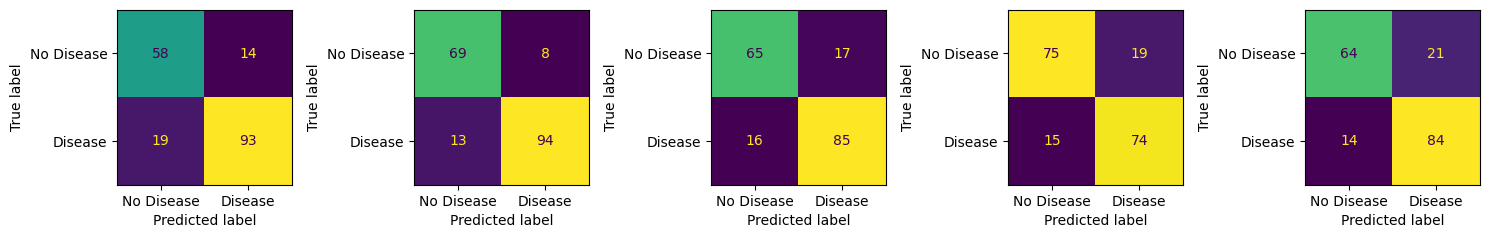

In [87]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

It also looks definitely better. The majority of true negatives were found.

## **TargetImputationTransformer**

In [88]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [89]:
X_trains4[0].columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [90]:
categorical_columns

['ChestPainType', 'RestingECG', 'ST_Slope']

In [91]:
X_trains4[0][categorical_columns].nunique()

,0
ChestPainType,4
RestingECG,3
ST_Slope,3


In [92]:
indices = [X_trains4[0].columns.get_loc(c) for c in categorical_columns]

In [93]:
lbl_encoder = LabelEncoder()

for j in range(5):
  for col in categorical_columns:
    X_trains4[j][col] = lbl_encoder.fit_transform(X_trains4[j][col])
    X_tests4[j][col] = lbl_encoder.transform(X_tests4[j][col])

  col_indices = [X_trains4[j].columns.get_loc(c) for c in categorical_columns]

  tg_transformer = TargetImputationTransformer(index=col_indices)

  X_trains4[j] = pd.DataFrame(tg_transformer.fit_transform(
    X=X_trains4[j].values,
    y=y_trains4[j].values),
    columns = X_trains4[j].columns
  )

  X_tests4[j] = pd.DataFrame(tg_transformer.transform(X_tests4[j].values),
      columns = X_tests4[j].columns
      )

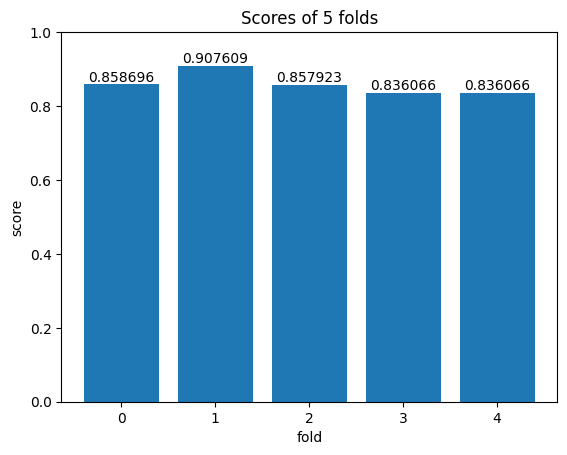

In [94]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))


ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Overall, it is good and generally works better than original one and better than FrequencyImputerTransformer.

In [95]:
X_trains4[0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.00000,733.000000,733.000000,733.000000
mean,53.624829,0.218281,0.538881,132.834925,200.875853,0.231924,0.538881,136.18281,0.407913,0.901228,0.538881
std,9.379945,0.413361,0.274442,17.763359,108.804028,0.422349,0.061321,25.38683,0.491782,1.086799,0.317836
min,29.000000,0.000000,0.115942,94.000000,0.000000,0.000000,0.495455,60.00000,0.000000,-2.600000,0.174051
25%,47.000000,0.000000,0.341317,120.000000,178.000000,0.000000,0.495455,119.00000,0.000000,0.000000,0.174051
50%,54.000000,0.000000,0.783163,130.000000,223.000000,0.000000,0.495455,138.00000,0.000000,0.500000,0.817439
75%,60.000000,0.000000,0.783163,140.000000,269.000000,0.000000,0.558442,155.00000,1.000000,1.500000,0.817439
max,77.000000,1.000000,0.783163,200.000000,603.000000,1.000000,0.654676,202.00000,1.000000,6.200000,0.817439


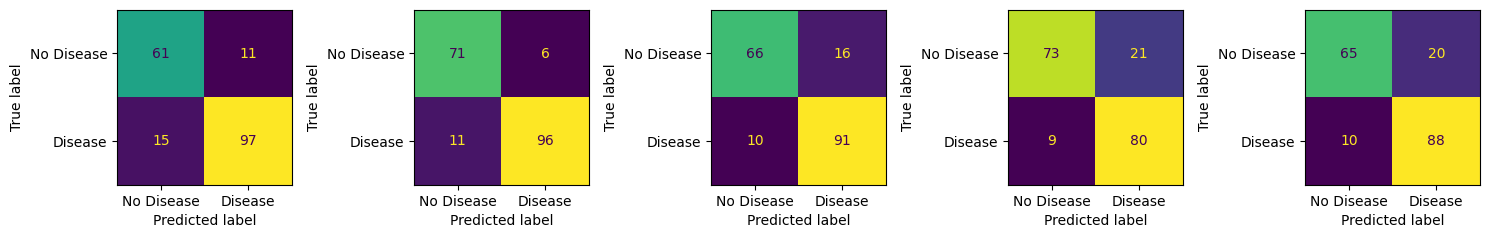

In [96]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

### **Best**

Let's try to make our results better - scale the data!

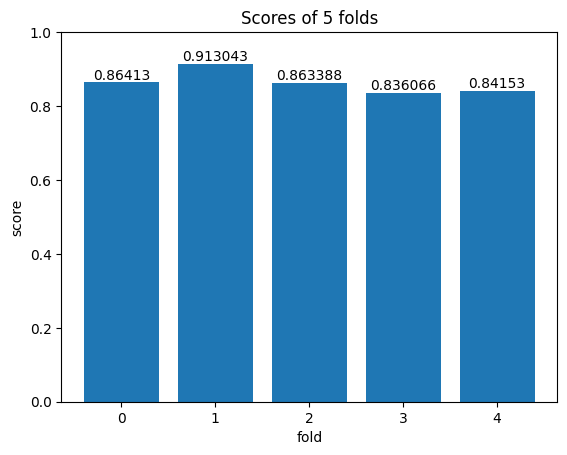

In [97]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = std_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = std_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Sligthly better.

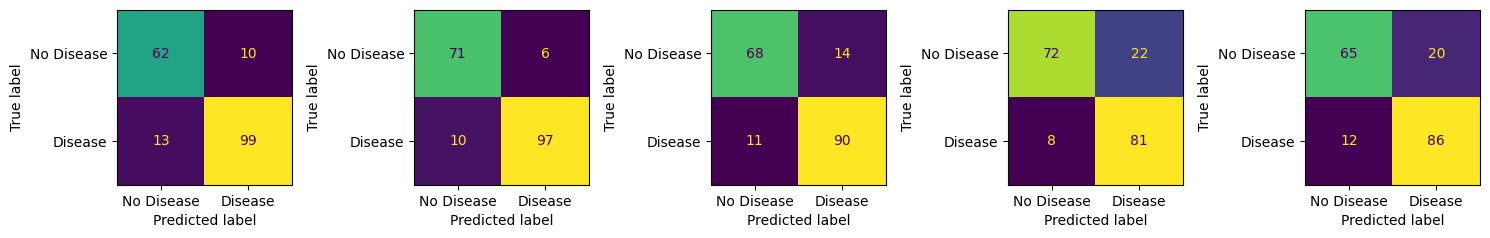

In [98]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

The performance is comparable with using dummies, in some cases even outperforming. Actually, I'd have taken that one instead of dummies, because it takes fewer dimensions - 1 per column, instead of nr. of categories per column.

In [99]:
df_av = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "neuromusic/avocado-prices",
  'avocado.csv',
)

Using Colab cache for faster access to the 'avocado-prices' dataset.


In [100]:
df_av['Date'] = (pd.to_datetime(df_av['Date'])).astype(int)
df_av['type'] = (df_av['type'] == 'conventional').astype(int)
df_av.drop(['Unnamed: 0', 'Total Bags', 'Total Volume'], axis=1, inplace=True)

In [101]:
df_av.sort_values(['Date'], inplace=True)

In [102]:
X = df_av.drop(['AveragePrice', 'region'], axis=1)
y = df_av['AveragePrice']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, shuffle=False)

In [103]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train3, y_train3)
print('RandomForestRegressor score on initial: ',rf.score(X_test3, y_test3))

RandomForestRegressor score on initial:  0.513568891106962


In [104]:
X = df_av.drop('AveragePrice', axis=1)
y = df_av['AveragePrice']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, shuffle=False)

In [105]:
lbl_encoder = LabelEncoder()

col_indices = [X_train3.columns.get_loc('region')]

X_train3["region"] = lbl_encoder.fit_transform(X_train3["region"])
X_test3["region"]  = lbl_encoder.transform(X_test3["region"])

tg_transformer = TargetImputationTransformer(index=col_indices)

X_train3 = pd.DataFrame(tg_transformer.fit_transform(
    X=X_train3.values,
    y=y_train3.values),
    columns = X_train3.columns
  )

X_test3 = pd.DataFrame(tg_transformer.transform(
    X=X_test3.values),
    columns = X_test3.columns
  )

In [106]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train3, y_train3)
print('RandomForestRegressor score: ', rf.score(X_test3, y_test3))

RandomForestRegressor score before lag:  0.5107717695533796


The results dropped, may be due to too many regions(50) with ~350 entries per region.

## **SmoothingTransformer**

In [107]:
X = df_heart.drop(['HeartDisease'], axis=1)
y = df_heart['HeartDisease']

splits = list(kf.split(X))

X_trains4 = [X.iloc[train_idx] for train_idx, _ in splits]
X_tests4  = [X.iloc[val_idx]   for _, val_idx in splits]
y_trains4 = [y.iloc[train_idx] for train_idx, _ in splits]
y_tests4  = [y.iloc[val_idx]   for _, val_idx in splits]

In [108]:
indices = [X_trains4[0].columns.get_loc(c) for c in categorical_columns]

In [109]:
lbl_encoder = LabelEncoder()

for j in range(5):
  for col in categorical_columns:
    X_trains4[j][col] = lbl_encoder.fit_transform(X_trains4[j][col])
    X_tests4[j][col] = lbl_encoder.transform(X_tests4[j][col])

  col_indices = [X_trains4[j].columns.get_loc(c) for c in categorical_columns]

  sm_transformer = SmoothingTransformer(index=col_indices)

  X_trains4[j] = pd.DataFrame(sm_transformer.fit_transform(
    X=X_trains4[j].values,
    y=y_trains4[j].values),
    columns = X_trains4[j].columns
  )

  X_tests4[j] = pd.DataFrame(sm_transformer.transform(X_tests4[j].values),
      columns = X_tests4[j].columns
      )

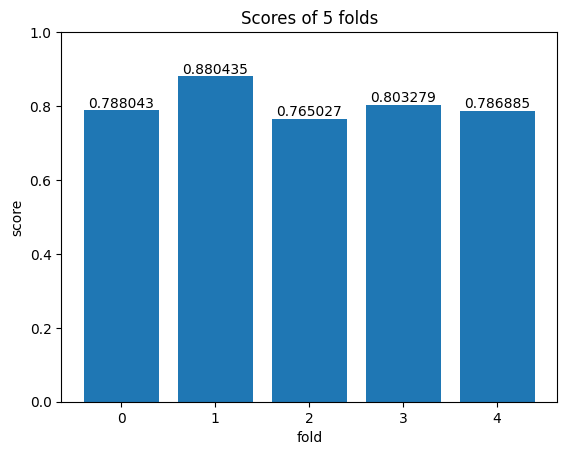

In [110]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Its performance is similar to the original one, and as we'll see from the values below, it had smoothen too much the data(values are really tiny!)

In [111]:
X_trains4[0].describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.00000,733.000000,733.000000,733.000000
mean,53.624829,0.218281,0.008330,132.834925,200.875853,0.231924,0.007594,136.18281,0.407913,0.901228,0.007594
std,9.379945,0.413361,0.002969,17.763359,108.804028,0.422349,0.001786,25.38683,0.491782,1.086799,0.004252
min,29.000000,0.000000,0.005064,94.000000,0.000000,0.000000,0.006179,60.00000,0.000000,-2.600000,0.003446
25%,47.000000,0.000000,0.006640,120.000000,178.000000,0.000000,0.006179,119.00000,0.000000,0.000000,0.003446
50%,54.000000,0.000000,0.009206,130.000000,223.000000,0.000000,0.006179,138.00000,0.000000,0.500000,0.009643
75%,60.000000,0.000000,0.009206,140.000000,269.000000,0.000000,0.009084,155.00000,1.000000,1.500000,0.009643
max,77.000000,1.000000,0.019136,200.000000,603.000000,1.000000,0.010424,202.00000,1.000000,6.200000,0.018778


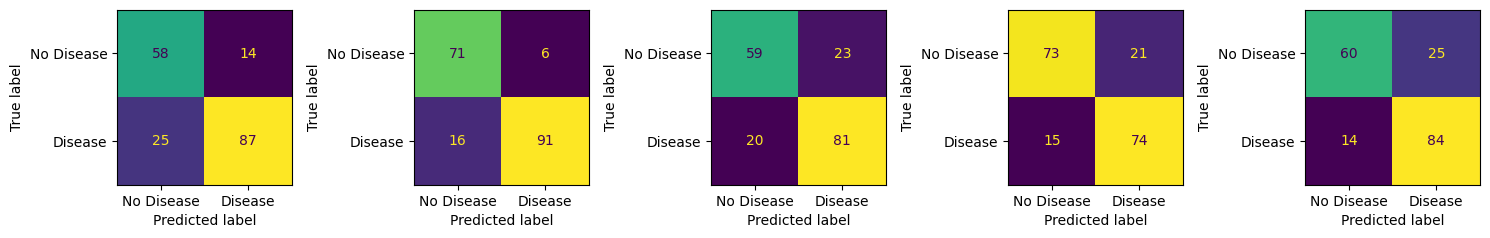

In [112]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['No Disease', 'Disease']
    )

    disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Let's try to enhance our results by scaling the data - maybe it'll help somehow.

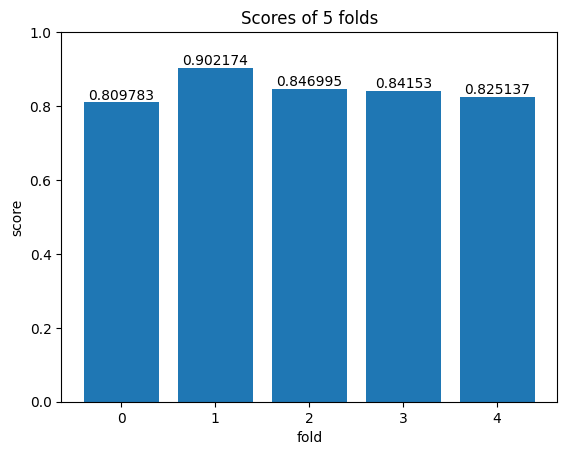

In [113]:
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR','Oldpeak', 'ChestPainType', 'RestingECG', 'ST_Slope']
mm_scaler = MinMaxScaler()
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

Overall, the score increased(even though one of the folds decreased)

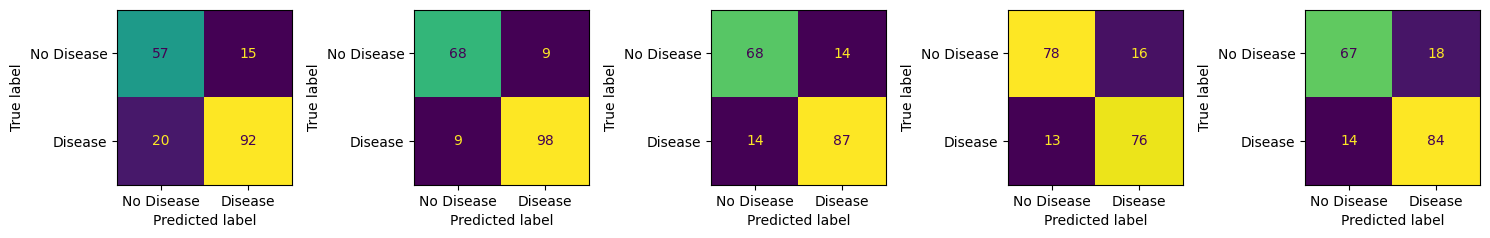

In [114]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled[cols_to_scale] = mm_scaler.fit_transform(X_train[cols_to_scale])
  X_test_scaled[cols_to_scale] = mm_scaler.transform(X_test[cols_to_scale])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Actually, it is the first time getting such bad results on the 1st fold and such great on the second.

On the whole, after scaling we see that Smoothing actually helped and made the result more accurate.

## **Lag features**

Looking at the fact that the avocado dataset is strongly correlated with time, I wanted to predict the prices based on the previous prices.

To predict even more accurately, I created a new feature with the mean of the prices for the previous year for each region separately.

In [115]:
df_av.sort_values(['Date'], inplace=True)

In [116]:
X = df_av.drop(['AveragePrice', 'region'], axis=1)
y = df_av['AveragePrice']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, shuffle=False)

In [117]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train3, y_train3)
print('RandomForestRegressor score on initial: ',rf.score(X_test3, y_test3))

RandomForestRegressor score on initial:  0.5159261421071979


In [118]:
X = df_av.drop(['AveragePrice'], axis=1)
y = df_av['AveragePrice']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, shuffle=False)

In [119]:
region_year_mean = (
    pd.concat([X_train3, y_train3], axis=1)
    .groupby(['region', 'year'])['AveragePrice']
    .mean()
)

In [120]:
region_year_mean = region_year_mean.groupby(level=0).shift(1)

X_train3['prev_year_mean'] = (
    X_train3.set_index(['region', 'year']).index
    .map(region_year_mean)
)

X_test3['prev_year_mean'] = (
    X_test3.set_index(['region', 'year']).index
    .map(region_year_mean)
)

In [121]:
X_train3['prev_year_mean'].fillna(X_train3['prev_year_mean'].mean(), inplace=True)
X_test3['prev_year_mean'].fillna(X_train3['prev_year_mean'].mean(), inplace=True)

Drop region - as dummies and target imputation transformer proved it meaningless.

In [122]:
X_train3.drop('region', axis=1, inplace=True)
X_test3.drop('region', axis=1, inplace=True)

In [123]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train3, y_train3)
print('RandomForestRegressor score with lag: ', rf.score(X_test3, y_test3))

RandomForestRegressor score with lag:  0.5041093400601397


The accuracy improved by +2%. So, the mean for the previous year by region has proved itself effective.

## **Feature Engineering**

Let's get back to avocados one more time. as we use feature 4046, 4225 and 4770 and they are correlated with each other, I want ot use it and create new features - share_4046 and share_4225, the ratios between 4046 and sum of others and for 4225 respectively.

In [124]:
X_train3['share_4046'] = X_train3['4046'] / (
    X_train3['4046'] + X_train3['4225'] + X_train3['4770']
).replace(0, np.nan)

X_test3['share_4046'] = X_test3['4046'] / (
    X_test3['4046'] + X_test3['4225'] + X_test3['4770']
).replace(0, np.nan)

X_train3['share_4225'] = X_train3['4225'] / (
    X_train3['4046'] + X_train3['4225'] + X_train3['4770']
).replace(0, np.nan)

X_test3['share_4225'] = X_test3['4225'] / (
    X_test3['4046'] + X_test3['4225'] + X_test3['4770']
).replace(0, np.nan)

In [125]:
X_train3.drop(['4046', '4225', '4770'], axis=1, inplace=True)
X_test3.drop(['4046', '4225', '4770'], axis=1, inplace=True)

In [126]:
rf = RandomForestRegressor()
rf.fit(X_train3, y_train3)
print('RandomForestRegressor score with feature engineering: ', rf.score(X_test3, y_test3))

RandomForestRegressor score with feature engineering:  0.4439256461528198


Okay, the performance dropped - this feature engineering is inconclusive for RandomForest.

## **Binning**

I wanted to try binning, but couldn't find the right example, so I'm doing it on heart disease

In [149]:
df_heart['Age'].nunique()

50

Let's try put those 50 in 20 bins.

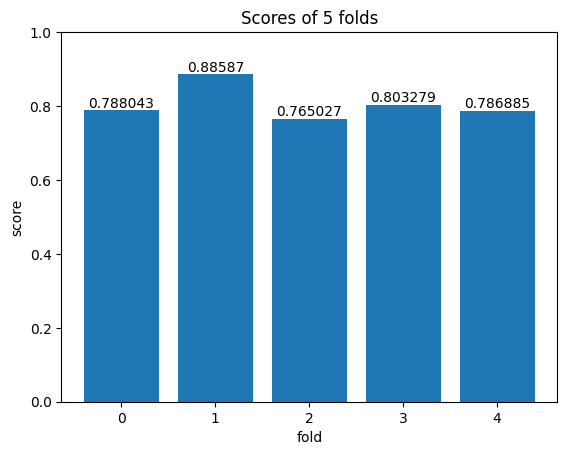

In [143]:
scores = []

for (X_train, X_test, y_train, y_test) in zip(X_trains4, X_tests4, y_trains4, y_tests4):
  bin_disc = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled['Age'] = bin_disc.fit_transform(X_train[['Age']])
  X_test_scaled['Age'] = bin_disc.transform(X_test[['Age']])

  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)
  scores.append(lr.score(X_test_scaled, y_test))

ax = plt.bar(x=range(5), height=scores)
plt.ylim((0,1))
plt.bar_label(ax)
plt.title('Scores of 5 folds')
plt.ylabel('score')
plt.xlabel('fold')
plt.show()

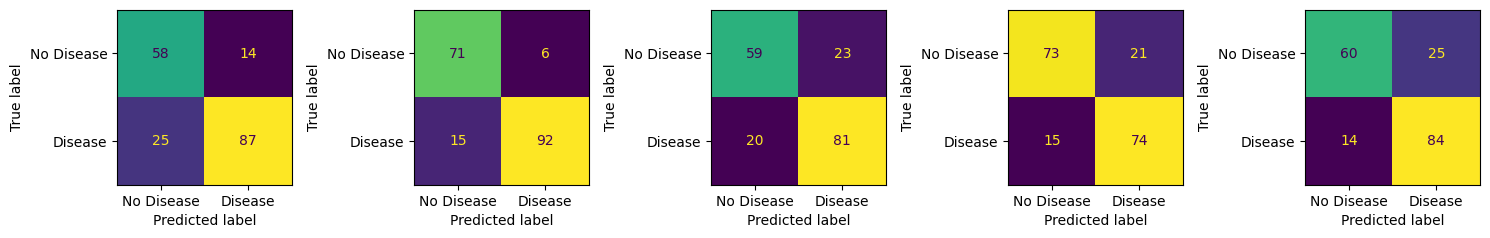

In [144]:
fig, axs = plt.subplots(ncols=5, figsize=(15, 15))

for i, (X_train, X_test, y_train, y_test) in enumerate(zip(X_trains4, X_tests4, y_trains4, y_tests4)):
  bin_disc = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
  X_train_scaled = X_train.copy()
  X_test_scaled = X_test.copy()

  X_train_scaled['Age'] = bin_disc.fit_transform(X_train[['Age']])
  X_test_scaled['Age'] = bin_disc.transform(X_test[['Age']])

  lr = LogisticRegression(random_state=42)
  lr.fit(X_train_scaled, y_train)
  y_pred = lr.predict(X_test_scaled)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
      display_labels=['No Disease', 'Disease']
  )

  disp.plot(ax=axs[i], colorbar=False)

plt.tight_layout()
plt.show()

Actually, the performance remained the same, even though the number of nunique decreased.

## **Polynomial Features**

In [183]:
X = df_av.drop(['AveragePrice'], axis=1)
y = df_av['AveragePrice']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, shuffle=False)

In [184]:
region_year_mean = (
    pd.concat([X_train3, y_train3], axis=1)
    .groupby(['region', 'year'])['AveragePrice']
    .mean()
)

In [185]:
region_year_mean = region_year_mean.groupby(level=0).shift(1)

X_train3['prev_year_mean'] = (
    X_train3.set_index(['region', 'year']).index
    .map(region_year_mean)
)

X_test3['prev_year_mean'] = (
    X_test3.set_index(['region', 'year']).index
    .map(region_year_mean)
)

In [186]:
X_train3['prev_year_mean'].fillna(X_train3['prev_year_mean'].mean(), inplace=True)
X_test3['prev_year_mean'].fillna(X_train3['prev_year_mean'].mean(), inplace=True)

In [187]:
X_train3.drop('region', axis=1, inplace=True)
X_test3.drop('region', axis=1, inplace=True)

In [196]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train3, y_train3)

print('RandomForestRegressor performance before polynomial features: ', rf.score(X_test3, y_test3))

RandomForestRegressor performance before polynomial features:  0.5041093400601397


I tried to make polynomial features using columns XLarge Bags and 4046.

In [197]:
pol_cols = ['XLarge Bags', '4046']
scores = []

poly = PolynomialFeatures(degree=2, include_bias=False)

features_train = poly.fit_transform(X_train3[pol_cols])
features_test = poly.transform(X_test3[pol_cols])

feature_names = poly.get_feature_names_out(pol_cols)

features_train = pd.DataFrame(
    features_train, columns=feature_names, index=X_train3.index)

features_test = pd.DataFrame(
    features_test, columns=feature_names, index=X_test3.index)

X_train_new = pd.concat([X_train3, features_train], axis=1)
X_test_new = pd.concat([X_test3, features_test], axis=1)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_new, y_train3)

print('RandomForestRegressor performance with polynomial features: ', rf.score(X_test_new, y_test3))

RandomForestRegressor performance with polynomial features:  0.4997661014931356


As we're dealing with RandomForest, polynomial features are unsuitable.

# **Conclusion**

Feature engineering plays a crucial role in machine learning because the quality of the input features directly affects model performance. Through experimentation, it became clear that extracting meaningful patterns from raw data requires both domain understanding and careful analysis of feature relationships with the target variable.

Additionally, different models respond differently to engineered features. Linear models often benefit significantly from polynomial and interaction features, while tree-based models such as Random Forest already capture non-linear relationships internally. Therefore, feature engineering should always be aligned with the chosen model and validated through experimentation rather than assumptions.